<a href="https://colab.research.google.com/github/faseeh-quraishi/Credit_Card_Users_Default_Prediction/blob/main/MAC_ML_Assignment_Summer2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Required installations**

In [ ]:
pip install ucimlrepo

In [ ]:
pip install imbalanced-learn

## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np  # Array processing
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Sampling techniques
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve
)

# Dataset fetching
from ucimlrepo import fetch_ucirepo


## **Data Collection & Loading**

In [ ]:
# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
features = default_of_credit_card_clients.data.features
targets = default_of_credit_card_clients.data.targets

## **Exploratory Data Analysis (EDA)**

In [ ]:
# metadata
# print(default_of_credit_card_clients.metadata)
print("Dataset Id: " + str(default_of_credit_card_clients.metadata.uci_id))
print("Name of Dataset: " + str(default_of_credit_card_clients.metadata.name))
print("Repository URL of Dataset: " + str(default_of_credit_card_clients.metadata.repository_url))
print("Dataset URL: " + str(default_of_credit_card_clients.metadata.data_url))
print("Dataset Abstract:\n" + str(default_of_credit_card_clients.metadata.abstract))
print("Year of dataset creation: " + str(default_of_credit_card_clients.metadata.year_of_dataset_creation))
print("Number of dataset instances: " + str(default_of_credit_card_clients.metadata.num_instances))
print("Number of dataset features: " + str(default_of_credit_card_clients.metadata.num_features))
print("Variables Information:\n" + str(default_of_credit_card_clients.metadata.additional_info.variable_info))

Dataset Id: 350
Name of Dataset: Default of Credit Card Clients
Repository URL of Dataset: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients
Dataset URL: https://archive.ics.uci.edu/static/public/350/data.csv
Dataset Abstract:
This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.
Year of dataset creation: 2009
Number of dataset instances: 30000
Number of dataset features: 23
Variables Information:
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital s

In [ ]:
features.columns = default_of_credit_card_clients.variables.description[1:24].tolist()
targets.rename(columns={targets.columns[0]:default_of_credit_card_clients.variables.description[24]},inplace=True)

/tmp/ipython-input-76-3855887506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets.rename(columns={targets.columns[0]:default_of_credit_card_clients.variables.description[24]},inplace=True)


In [ ]:
mainDataTable = pd.concat([features,targets],axis=1)
mainDataTable

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
targets.head()

,default payment next month
0,1
1,1
2,0
3,0
4,0


In [ ]:
features.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804
29999,50000,1,2,1,46,0,0,0,0,0,...,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000


In [ ]:
targets.tail()

,default payment next month
29995,0
29996,0
29997,1
29998,1
29999,1


In [ ]:
type(features)

pandas.core.frame.DataFrame

In [ ]:
type(targets)

pandas.core.frame.DataFrame

In [ ]:
features.ndim

2

In [ ]:
targets.ndim

2

In [ ]:
features.shape

(30000, 23)

In [ ]:
targets.shape

(30000, 1)

In [ ]:
features.dtypes

,0
LIMIT_BAL,int64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64
PAY_5,int64


In [ ]:
targets.dtypes

,0
default payment next month,int64


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [ ]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default payment next month  30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB


In [ ]:
features.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
targets.describe()

,default payment next month
count,30000.000000
mean,0.221200
std,0.415062
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
features.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [ ]:
targets.columns

Index(['default payment next month'], dtype='object')

In [ ]:
targets['default payment next month'].nunique()

2

In [ ]:
targets['default payment next month'].unique()

array([1, 0])

In [ ]:
targets['default payment next month'].value_counts().rename('count'), targets['default payment next month'].value_counts(True).mul(100).rename('Percentage(%)')

(default payment next month
 0    23364
 1     6636
 Name: count, dtype: int64,
 default payment next month
 0    77.88
 1    22.12
 Name: Percentage(%), dtype: float64)

In [ ]:
targets.sample(20)

,default payment next month
20118,0
11952,1
7516,0
19613,0
2505,0
9592,0
27282,0
13025,0
25417,0
4558,1


In [ ]:
categorical_features = [feature for feature in mainDataTable.columns if mainDataTable[feature].dtype == 'O']
print('categorical features:',categorical_features)

categorical features: []


In [ ]:
numerical_features = [feature for feature in mainDataTable.columns if mainDataTable[feature].dtype != 'object']
pd.DataFrame(numerical_features,columns=['Numerical Features'])

,Numerical Features
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE
5,PAY_0
6,PAY_2
7,PAY_3
8,PAY_4
9,PAY_5


/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


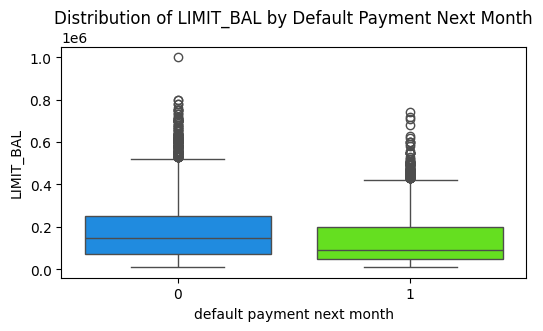

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


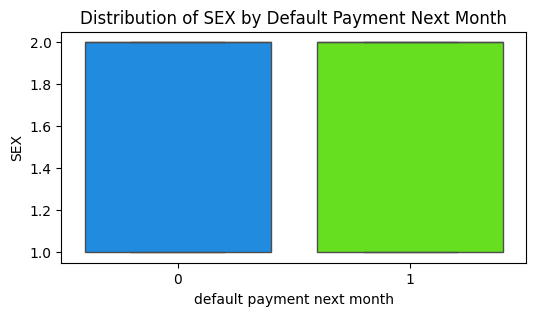

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


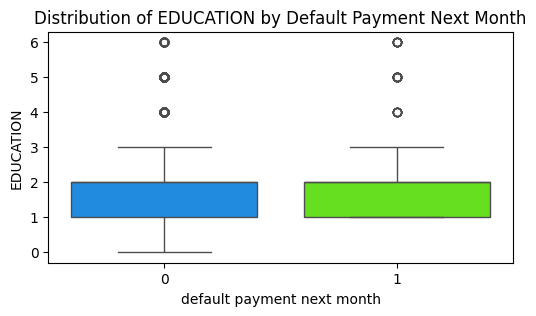

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


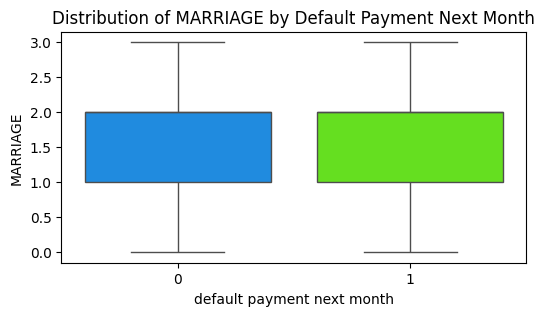

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


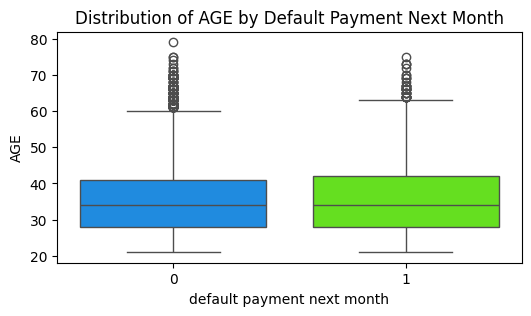

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


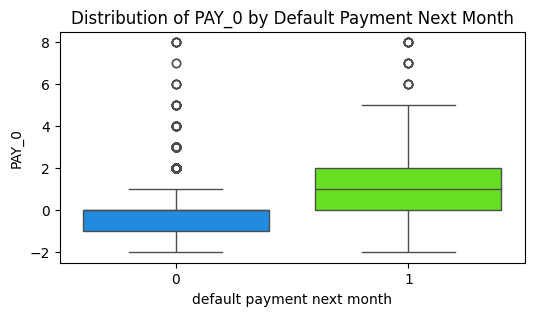

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


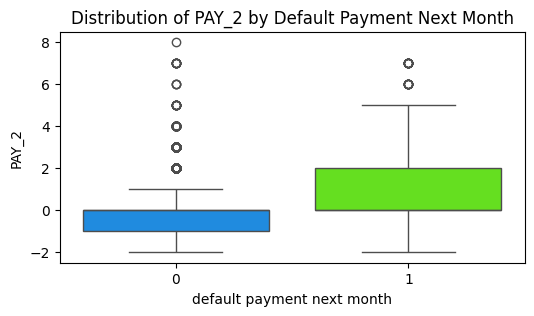

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


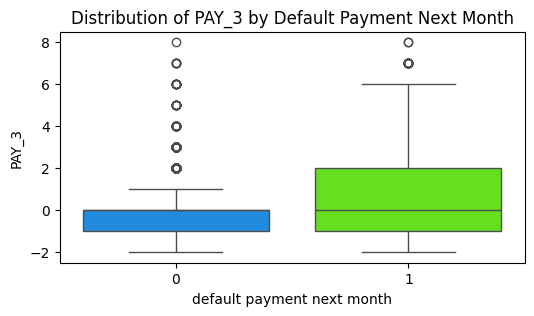

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


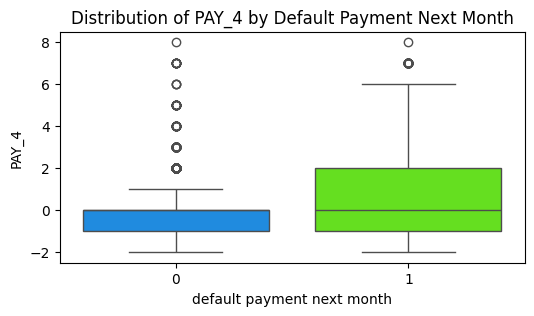

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


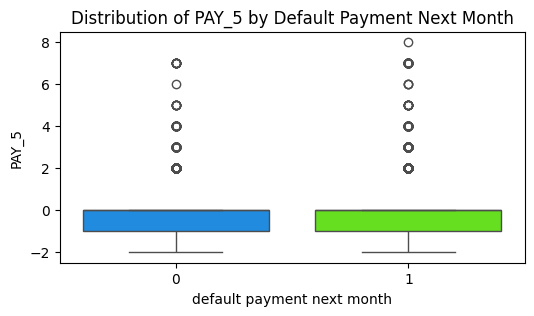

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


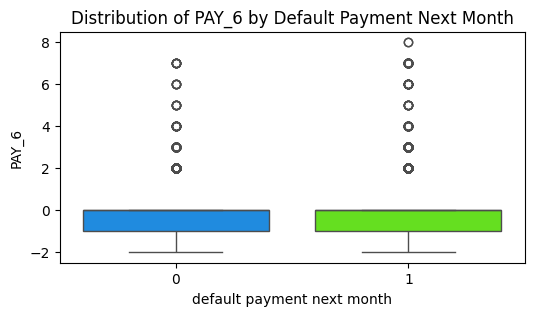

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


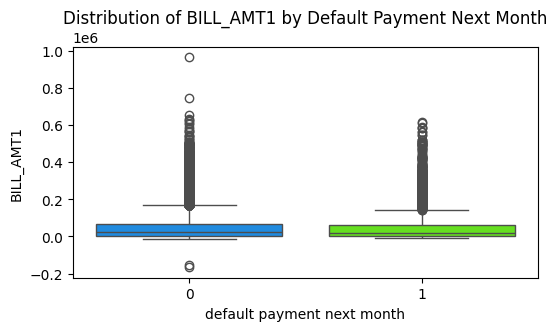

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


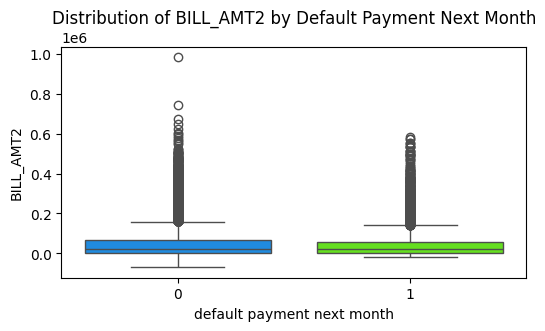

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


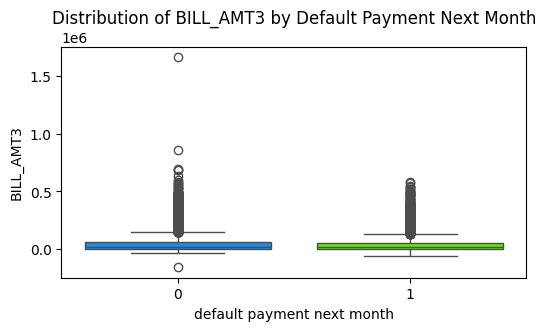

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


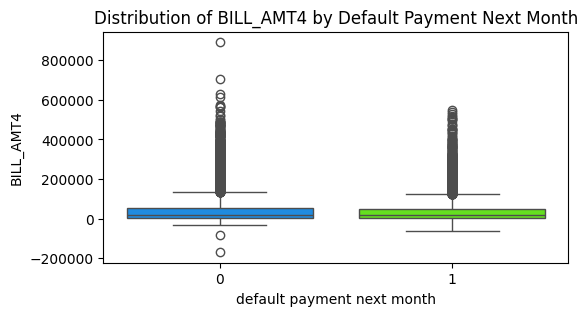

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


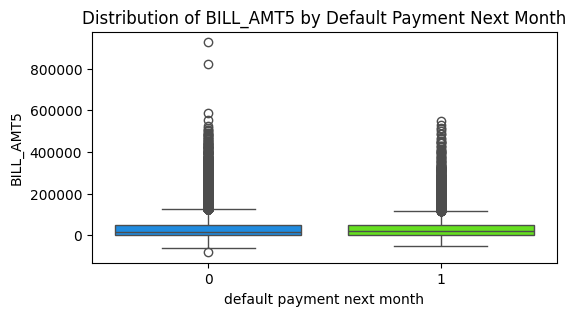

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


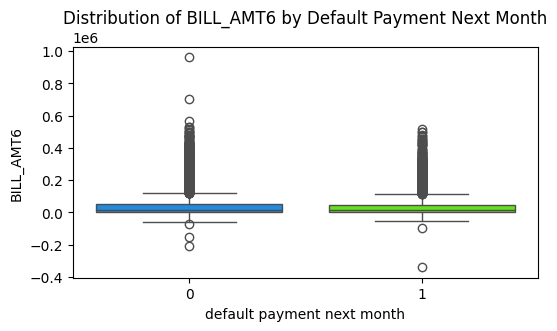

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


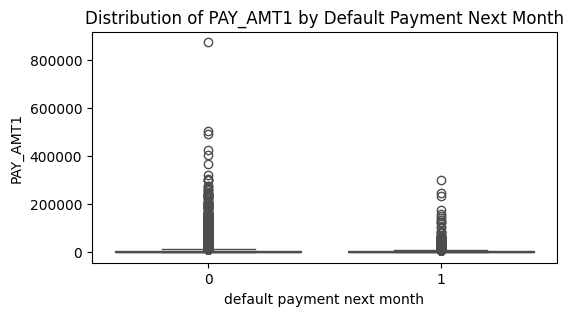

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


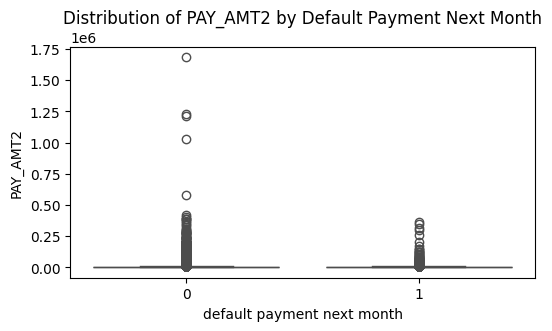

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


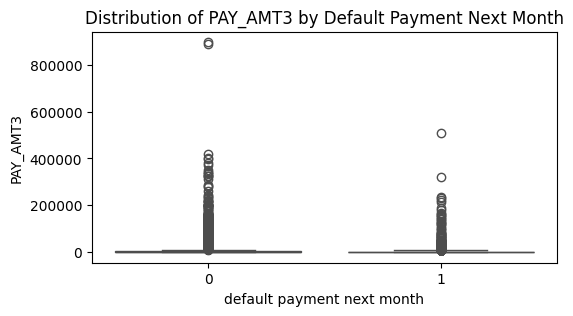

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


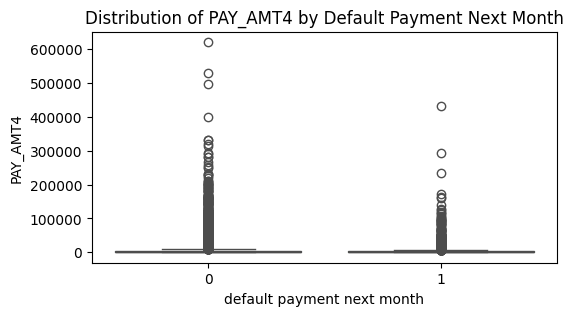

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


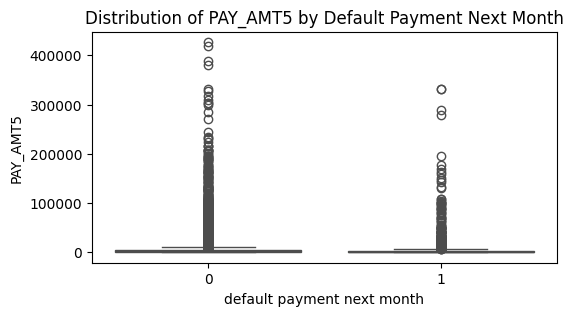

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


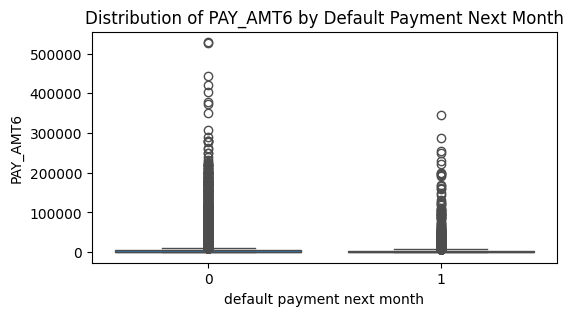

/tmp/ipython-input-102-2801978055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


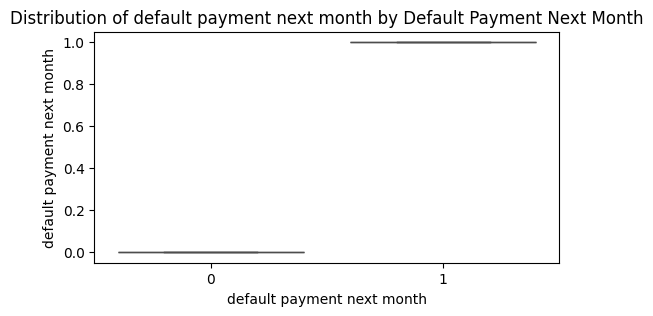

In [ ]:
# Visualizing numerical data
for col in numerical_features:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')
    plt.title(f'Distribution of {col} by Default Payment Next Month')
    plt.show()

In [ ]:
mainDataTable.isnull()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
mainDataTable.isnull().any()

,0
LIMIT_BAL,False
SEX,False
EDUCATION,False
MARRIAGE,False
AGE,False
PAY_0,False
PAY_2,False
PAY_3,False
PAY_4,False
PAY_5,False


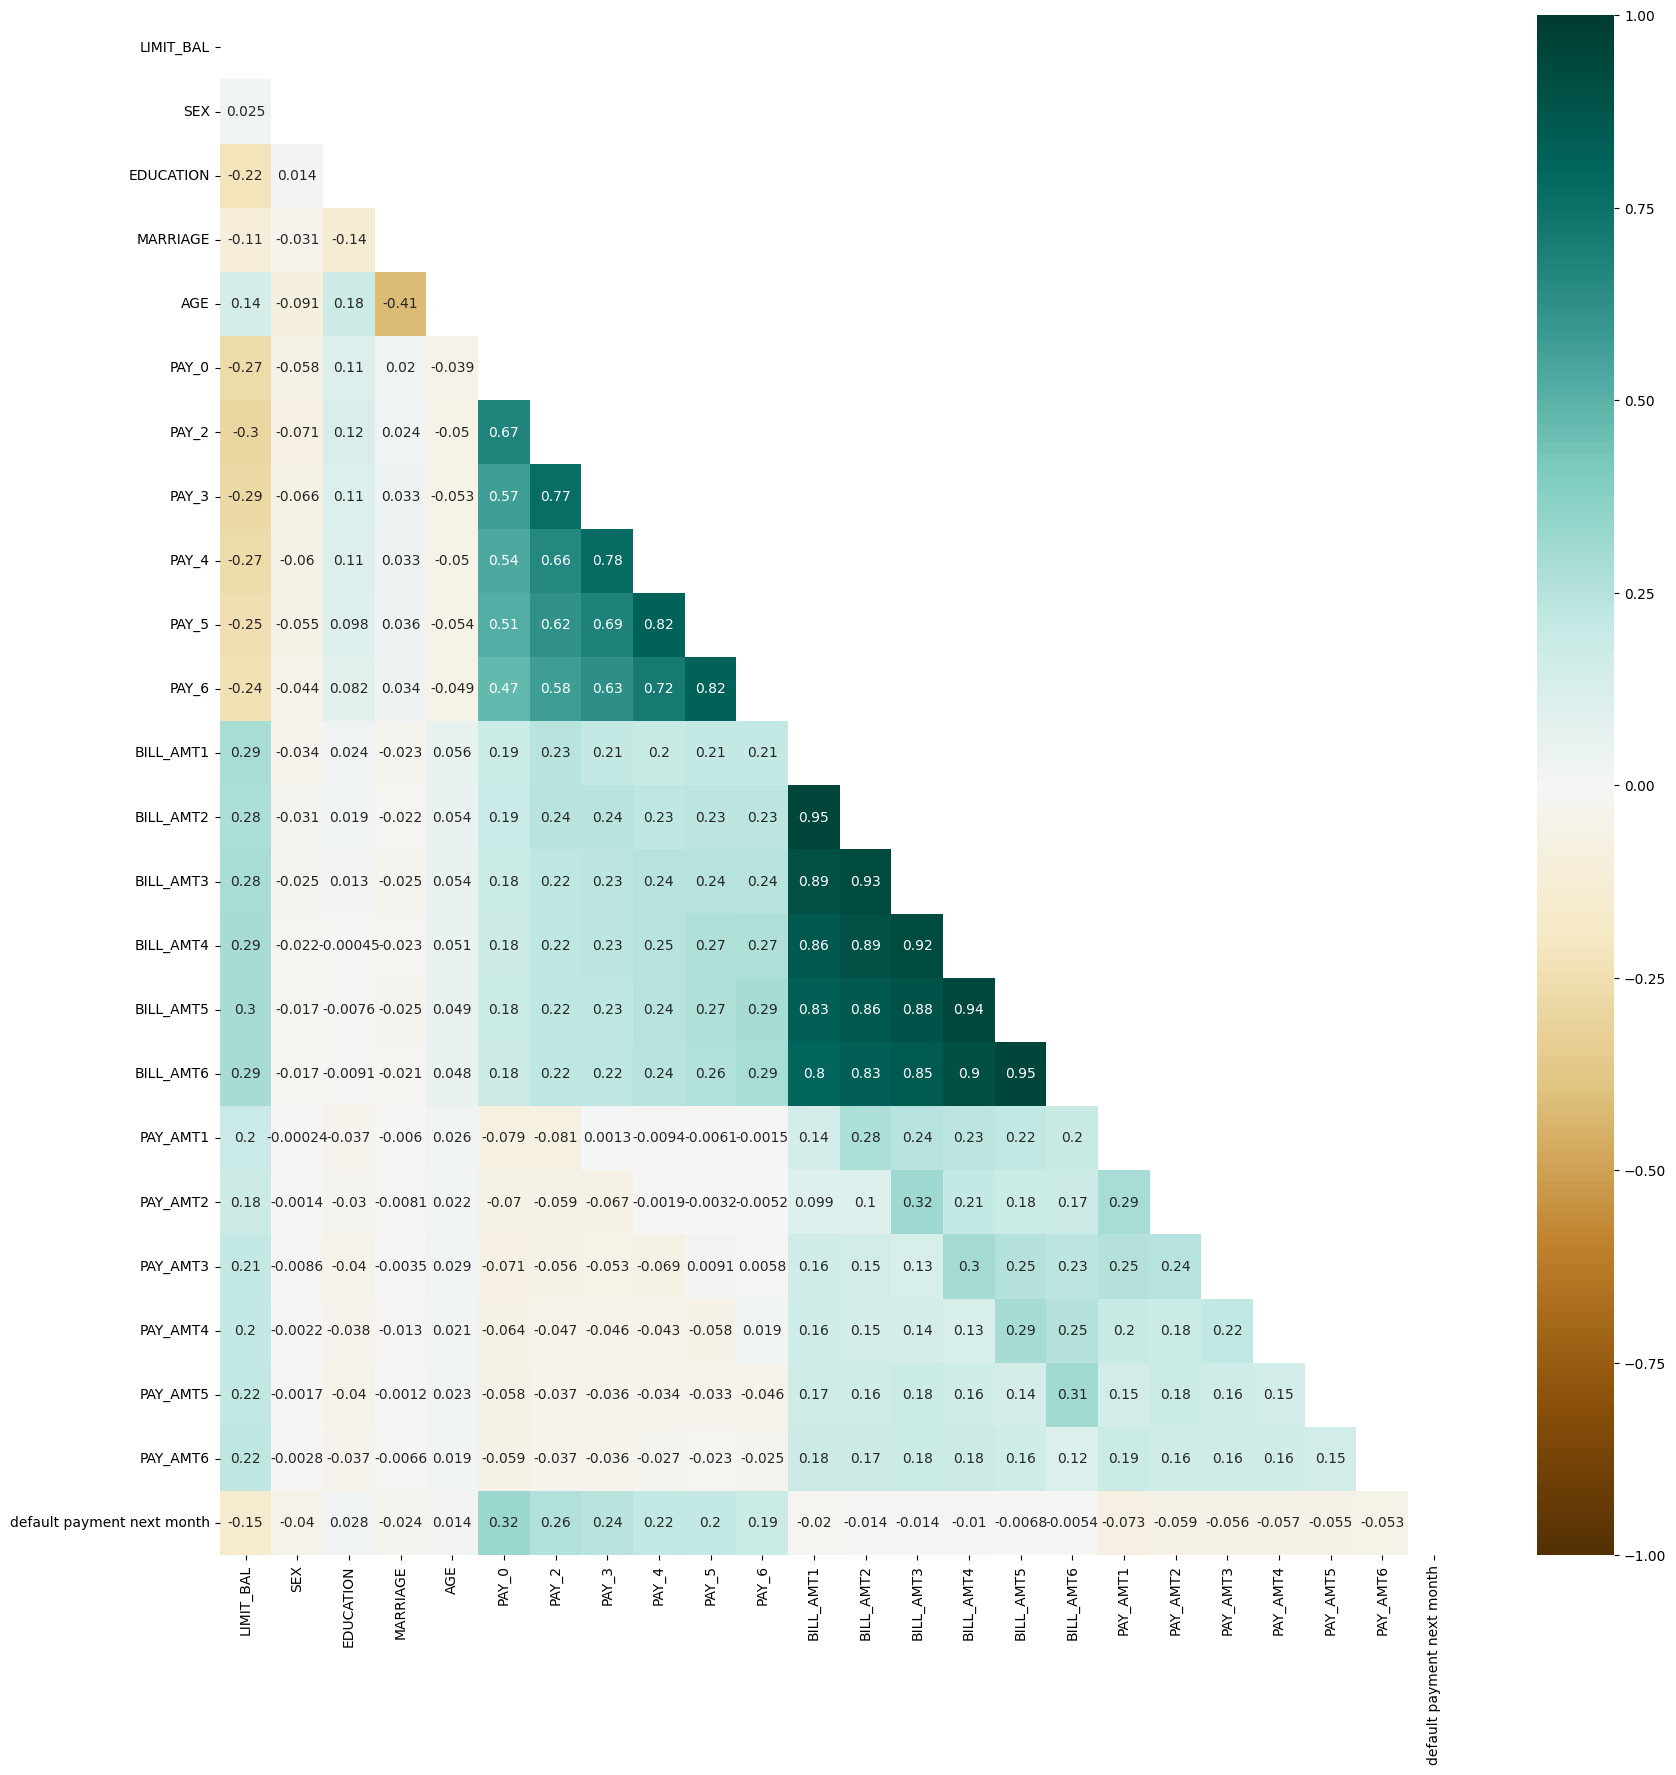

In [ ]:
corr = mainDataTable.corr()  # Compute correlation matrix

mask = np.triu(np.ones_like(corr, dtype=bool))  # Upper triangle mask

plt.figure(figsize=(20, 20))  # Set figure size

sns.heatmap(
    corr,
    center=0,
    vmin=-1,
    vmax=1,
    mask=mask,
    annot=True,        # Show correlation values
    cmap='BrBG'        # Diverging colormap
)

plt.show()


In [ ]:
print('Missing data sum: ')
mainDataTable.isnull().sum()

Missing data sum: 


,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [ ]:
print('Missing Data Percentage:')
(mainDataTable.isnull().sum()/mainDataTable.count()).mul(100)

Missing Data Percentage:


,0
LIMIT_BAL,0.0
SEX,0.0
EDUCATION,0.0
MARRIAGE,0.0
AGE,0.0
PAY_0,0.0
PAY_2,0.0
PAY_3,0.0
PAY_4,0.0
PAY_5,0.0


Text(0.5, 0, 'Default Status')

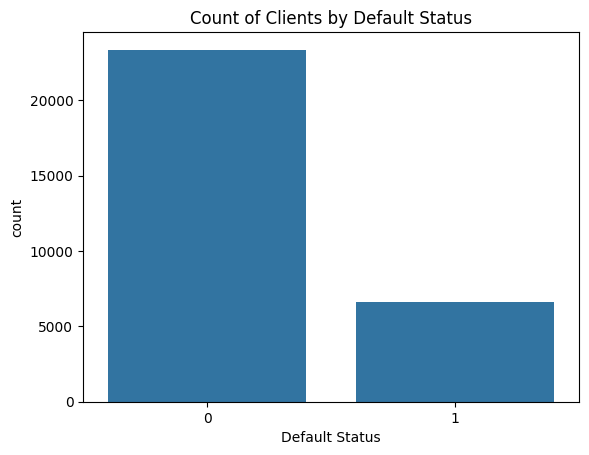

In [ ]:
sns.countplot(data = mainDataTable, x = 'default payment next month')
plt.title('Count of Clients by Default Status')
plt.xlabel('Default Status')

## **Data Preprocessing**

In [ ]:
print('Before removing duplicates:', mainDataTable.duplicated().sum())

mainDataTable.drop_duplicates(inplace=True)  # Removes duplicate rows in-place

features = mainDataTable[mainDataTable.columns[:-1]]  # All columns except the last as features
targets = mainDataTable[mainDataTable.columns[-1]]    # Last column as the target

print('After removing duplicates:', mainDataTable.duplicated().sum())
print('Shape of the features and targets respectively:', features.shape,targets.shape)


Before removing duplicates: 35
After removing duplicates: 0
Shape of the features and targets respectively: (29965, 23) (29965,)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features) # Standarization

In [ ]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled,targets, test_size=0.2, random_state = 42, stratify = targets)


In [ ]:
# Check original distribution
counter = Counter(y_train.values.ravel())
print("Original class distribution:", counter)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# X_balanced, y_balanced = ros.fit_resample(X_temp, y_temp)

# Check new distribution
print("Balanced class distribution:", Counter(y_train_resampled.ravel()))

Original class distribution: Counter({np.int64(0): 18668, np.int64(1): 5304})
Balanced class distribution: Counter({np.int64(0): 18668, np.int64(1): 18668})


/tmp/ipython-input-112-1745175688.py:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print("Balanced class distribution:", Counter(y_train_resampled.ravel()))


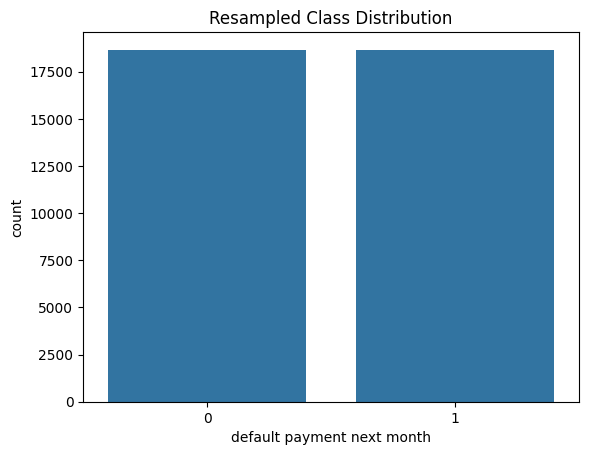

In [ ]:
sns.countplot(x=y_train_resampled)
plt.title("Resampled Class Distribution")
plt.show()

## **Decision Tree Models**

In [ ]:
model_DTCa = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

model_DTCa.fit(X_train_resampled, y_train_resampled)

model_DTCa_prediction = model_DTCa.predict(X_test)

model_DTCa_TestAccuracy = model_DTCa.score(X_test, y_test)
model_DTCa_TrainingAccuracy = model_DTCa.score(X_train_resampled, y_train_resampled)

print('Testing Accuracy =',str(model_DTCa_TestAccuracy*100),'\nTraining Accuracy =',str(model_DTCa_TrainingAccuracy*100))

Testing Accuracy = 77.37360253629234 
Training Accuracy = 71.0386758088708


In [ ]:
# Evaluation Metrics
acc = accuracy_score(y_test, model_DTCa_prediction)
prec = precision_score(y_test, model_DTCa_prediction)
rec = recall_score(y_test, model_DTCa_prediction)
f1 = f1_score(y_test, model_DTCa_prediction)
cm = confusion_matrix(y_test, model_DTCa_prediction)

# Output results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

# Optional: full classification report
print("\nClassification Report:\n", classification_report(y_test, model_DTCa_prediction, target_names=["Negative", "Positive"]))

y_scorses = model_DTCb.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_scorses)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7737360253629234
Precision: 0.48945147679324896
Recall: 0.5248868778280543
F1 Score: 0.5065502183406113
Confusion Matrix:
 [[3941  726]
 [ 630  696]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.84      0.85      4667
    Positive       0.49      0.52      0.51      1326

    accuracy                           0.77      5993
   macro avg       0.68      0.68      0.68      5993
weighted avg       0.78      0.77      0.78      5993

ROC-AUC Score: 0.7314


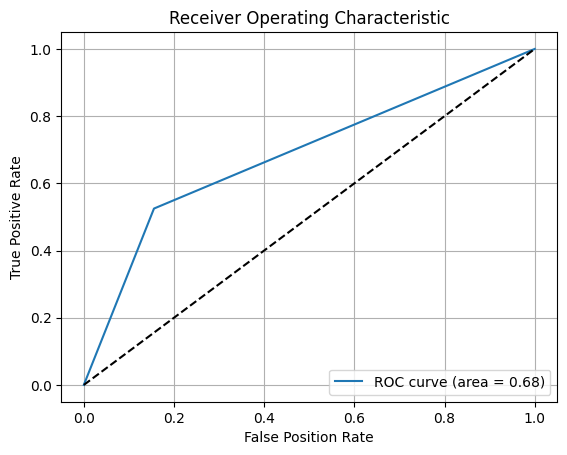

In [ ]:
#targets_scorses
fpr, tpr, thresholds = roc_curve(y_test, model_DTCa_prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Position Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

In [ ]:
model_DTCb = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    random_state=42
)

model_DTCb.fit(X_train_resampled, y_train_resampled)

model_DTCb_prediction = model_DTCb.predict(X_test)

model_DTCb_TestAccuracy = model_DTCb.score(X_test, y_test)
model_DTCb_TrainingAccuracy = model_DTCb.score(X_train_resampled, y_train_resampled)

print('Testing Accuracy =',str(model_DTCb_TestAccuracy*100),'\nTraining Accuracy =',str(model_DTCb_TrainingAccuracy*100))

Testing Accuracy = 78.14116469214083 
Training Accuracy = 72.35108206556674


In [ ]:
# Evaluation Metrics
acc = accuracy_score(y_test, model_DTCb_prediction)
prec = precision_score(y_test, model_DTCb_prediction)
rec = recall_score(y_test, model_DTCb_prediction)
f1 = f1_score(y_test, model_DTCb_prediction)
cm = confusion_matrix(y_test, model_DTCb_prediction)

# Output results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

# Optional: full classification report
print("\nClassification Report:\n", classification_report(y_test, model_DTCb_prediction, target_names=["Negative", "Positive"]))

y_scorses = model_DTCb.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_scorses)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7814116469214083
Precision: 0.5059084194977843
Recall: 0.5165912518853696
F1 Score: 0.5111940298507462
Confusion Matrix:
 [[3998  669]
 [ 641  685]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.86      0.86      4667
    Positive       0.51      0.52      0.51      1326

    accuracy                           0.78      5993
   macro avg       0.68      0.69      0.69      5993
weighted avg       0.78      0.78      0.78      5993

ROC-AUC Score: 0.7314


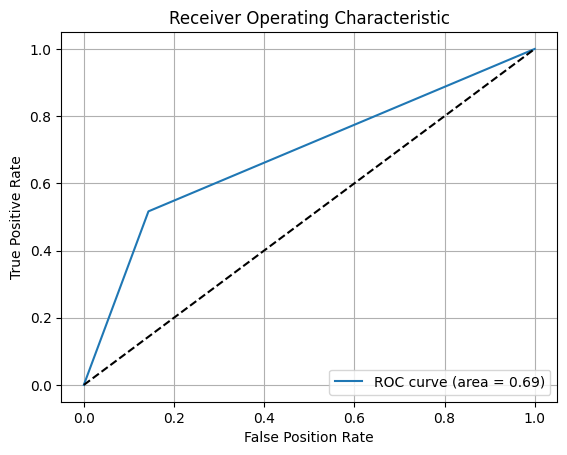

In [ ]:
#targets_scorses
fpr, tpr, thresholds = roc_curve(y_test, model_DTCb_prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Position Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

In [ ]:
model_DTCc = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    random_state=42
)

model_DTCc.fit(X_train_resampled, y_train_resampled)

model_DTCc_prediction = model_DTCc.predict(X_test)

model_DTCc_TestAccuracy = model_DTCc.score(X_test, y_test)
model_DTCc_TrainingAccuracy = model_DTCc.score(X_train_resampled, y_train_resampled)

print('Testing Accuracy =',str(model_DTCc_TestAccuracy*100),'\nTraining Accuracy =',str(model_DTCc_TrainingAccuracy*100))

Testing Accuracy = 72.80160186884699 
Training Accuracy = 76.45971716305978


In [ ]:
# Evaluation Metrics
acc = accuracy_score(y_test, model_DTCc_prediction)
prec = precision_score(y_test, model_DTCc_prediction)
rec = recall_score(y_test, model_DTCc_prediction)
f1 = f1_score(y_test, model_DTCc_prediction)
cm = confusion_matrix(y_test, model_DTCc_prediction)

# Output results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

# Optional: full classification report
print("\nClassification Report:\n", classification_report(y_test, model_DTCc_prediction, target_names=["Negative", "Positive"]))

y_scorses = model_DTCc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_scorses)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7280160186884699
Precision: 0.41657519209659716
Recall: 0.5723981900452488
F1 Score: 0.4822109275730623
Confusion Matrix:
 [[3604 1063]
 [ 567  759]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.77      0.82      4667
    Positive       0.42      0.57      0.48      1326

    accuracy                           0.73      5993
   macro avg       0.64      0.67      0.65      5993
weighted avg       0.77      0.73      0.74      5993

ROC-AUC Score: 0.7226


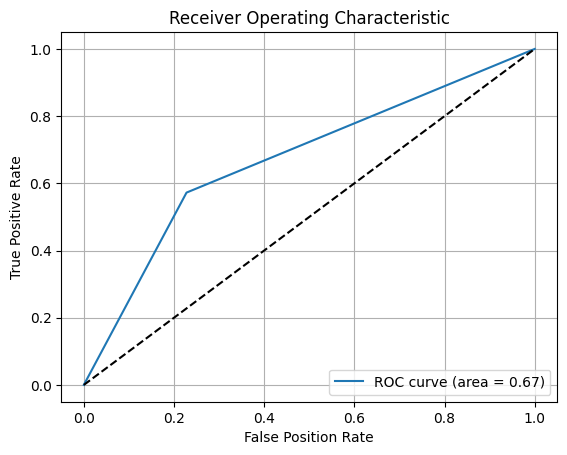

In [ ]:
#targets_scorses
fpr, tpr, thresholds = roc_curve(y_test, model_DTCc_prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Position Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

## **Logistic Regression Models**


In [ ]:
logisticRegressionModel = LogisticRegression(max_iter=2000, random_state=42)
logisticRegressionModel.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=2000, random_state=42)

In [ ]:
y_pred = logisticRegressionModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4667
           1       0.73      0.25      0.37      1326

    accuracy                           0.81      5993
   macro avg       0.77      0.61      0.63      5993
weighted avg       0.80      0.81      0.78      5993



In [ ]:
logisticRegressionModel = LogisticRegression(max_iter=2000, random_state=42)
logisticRegressionModel.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=2000, random_state=42)

In [ ]:
y_resampled_pred = logisticRegressionModel.predict(X_test)
print(classification_report(y_test, y_resampled_pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4667
           1       0.37      0.63      0.46      1326

    accuracy                           0.68      5993
   macro avg       0.62      0.66      0.62      5993
weighted avg       0.76      0.68      0.70      5993



In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5, scoring='f1')
grid.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid.best_params_)
print("Best cross-validation F1 score:", grid.best_score_)

Best parameters: {'C': 0.01}
Best cross-validation F1 score: 0.6724838738326282


In [ ]:
param_grid = {'C': [0.001, 0.003, 0.005, 0.007, 0.009, 0.01, 0.012]}
grid = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5, scoring='f1')
grid.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid.best_params_)
print("Best cross-validation F1 score:", grid.best_score_)

Best parameters: {'C': 0.005}
Best cross-validation F1 score: 0.6728789793491919


In [ ]:
logisticRegressionModel = LogisticRegression(C=0.003, max_iter=2000, random_state=42)
logisticRegressionModel.fit(X_train_resampled, y_train_resampled.values.ravel())

LogisticRegression(C=0.003, max_iter=2000, random_state=42)

In [ ]:
y_resampled_pred = logisticRegressionModel.predict(X_test)
print(classification_report(y_test, y_resampled_pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4667
           1       0.37      0.64      0.47      1326

    accuracy                           0.68      5993
   macro avg       0.62      0.66      0.62      5993
weighted avg       0.76      0.68      0.70      5993



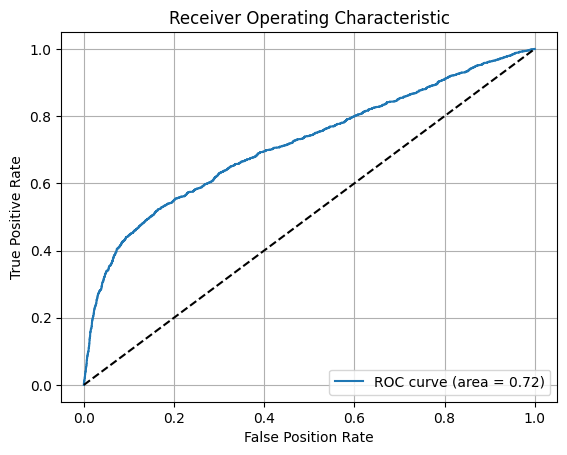

In [ ]:
y_scorses = logisticRegressionModel.predict_proba(X_test)[:,1] #Rate of false for every test case
#targets_scorses
fpr, tpr, thresholds = roc_curve(y_test, y_scorses)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Position Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scorses)
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best Threshold: {best_threshold:.2f}")

y_pred_opt = (y_scorses >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_opt))

trainAccuracy = logisticRegressionModel.score(X_train_resampled, y_train_resampled)
testAccuracy = logisticRegressionModel.score(X_test, y_test)

print('Testing Accuracy =',str(testAccuracy*100),'\nTraining Accuracy =',str(trainAccuracy*100))

y_scorses = logisticRegressionModel.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_scorses)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Best Threshold: 0.55
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4667
           1       0.47      0.52      0.50      1326

    accuracy                           0.77      5993
   macro avg       0.67      0.68      0.67      5993
weighted avg       0.77      0.77      0.77      5993

Testing Accuracy = 67.8124478558318 
Training Accuracy = 67.81390614956074
ROC-AUC Score: 0.7161


## **K-Nearest Neighbour Model**

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scorses)
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best Threshold: {best_threshold:.2f}")

y_pred_opt = (y_scorses >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_opt))

trainAccuracy = model.score(X_train, y_train)
testAccuracy = model.score(X_test, y_test)

print('Testing Accuracy =',str(testAccuracy*100),'\nTraining Accuracy =',str(trainAccuracy*100))

Best Threshold: 0.27
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      4667
           1       0.45      0.56      0.50      1326

    accuracy                           0.75      5993
   macro avg       0.66      0.68      0.66      5993
weighted avg       0.77      0.75      0.76      5993

Testing Accuracy = 79.32588019355916 
Training Accuracy = 84.22326047054898


In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 17, 21, 25, 27],
    'weights': ['distance'],
    'metric': ['euclidean']
}
knnModel = KNeighborsClassifier()

# 5-fold cross-validation
grid_search = GridSearchCV(knnModel, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best combination
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Best F1 Score: 0.4399158027459545


In [ ]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))

trainAccuracy = best_knn.score(X_train, y_train)
testAccuracy = best_knn.score(X_test, y_test)

print('Testing Accuracy =',str(testAccuracy*100),'\nTraining Accuracy =',str(trainAccuracy*100))

print("ROC-AUC Score:", roc_auc_score(y_test, best_knn.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4667
           1       0.62      0.34      0.44      1326

    accuracy                           0.81      5993
   macro avg       0.73      0.64      0.66      5993
weighted avg       0.79      0.81      0.78      5993

Testing Accuracy = 80.74420156849658 
Training Accuracy = 99.94994159853162
ROC-AUC Score: 0.734038955200679


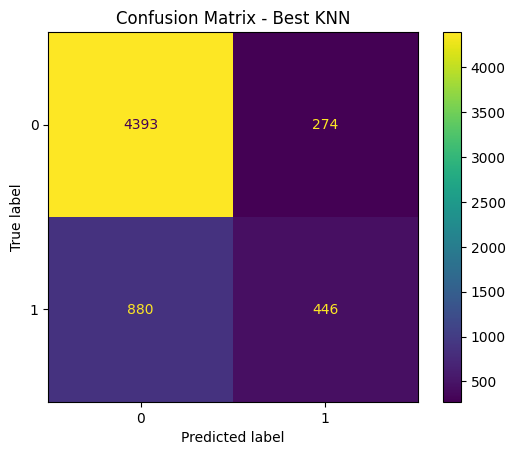

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test)
plt.title("Confusion Matrix - Best KNN")
plt.show()

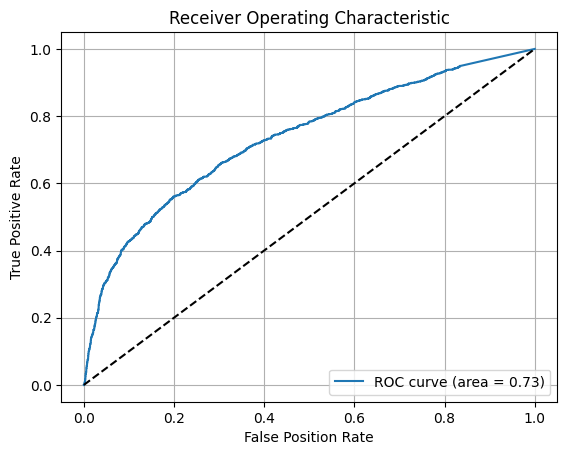

In [ ]:
y_scorses = best_knn.predict_proba(X_test)[:,1] #Rate of false for every test case
#targets_scorses
fpr, tpr, thresholds = roc_curve(y_test, y_scorses)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Position Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()


## **Gaussian Naive Bayes**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)[:, 1]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.78      4667
           1       0.38      0.67      0.49      1326

    accuracy                           0.69      5993
   macro avg       0.63      0.68      0.63      5993
weighted avg       0.77      0.69      0.71      5993



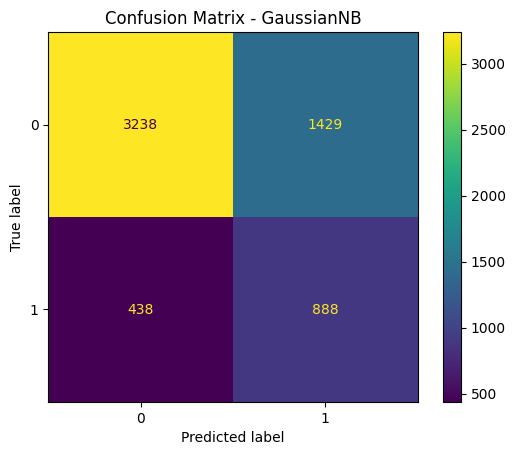

AUC Score: 0.7283


In [ ]:
# report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)
plt.title("Confusion Matrix - GaussianNB")
plt.show()

# AUC value
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")

In [ ]:
gnb.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)[:, 1]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.27      0.42      4667
           1       0.25      0.87      0.39      1326

    accuracy                           0.40      5993
   macro avg       0.57      0.57      0.40      5993
weighted avg       0.74      0.40      0.41      5993



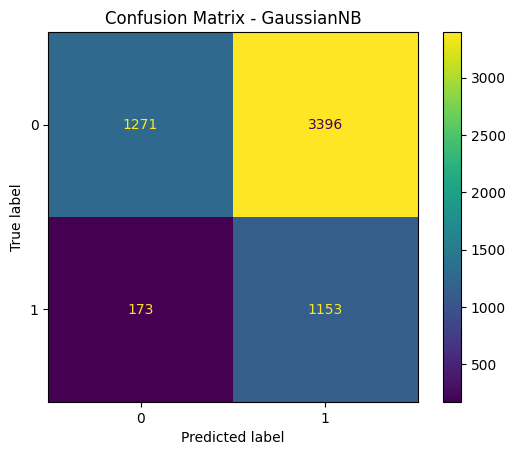

AUC Score: 0.7214


In [ ]:
# report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)
plt.title("Confusion Matrix - GaussianNB")
plt.show()

# AUC value
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")

In [ ]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
gnb = GaussianNB()
grid = GridSearchCV(gnb, param_grid, cv=5, scoring='f1')
grid.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'var_smoothing': 1e-05}
Best score: 0.687414145771877


In [ ]:
gnb = GaussianNB(var_smoothing = 1e-5)
gnb.fit(X_train_resampled, y_train_resampled)

GaussianNB(var_smoothing=1e-05)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.27      0.42      4667
           1       0.25      0.87      0.39      1326

    accuracy                           0.40      5993
   macro avg       0.57      0.57      0.40      5993
weighted avg       0.74      0.40      0.41      5993



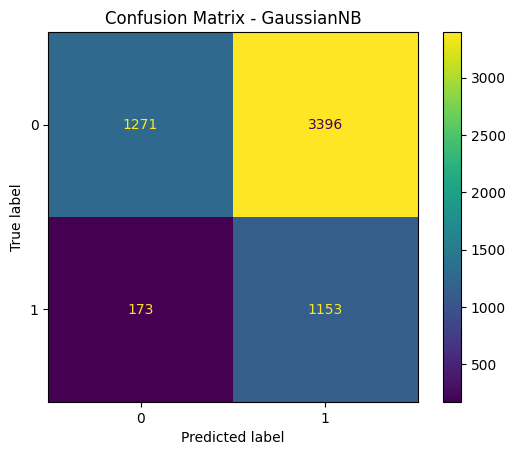

AUC Score: 0.7214


In [ ]:
# report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)
plt.title("Confusion Matrix - GaussianNB")
plt.show()

# AUC value
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scorses)
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best Threshold: {best_threshold:.2f}")

y_pred_opt = (y_scorses >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_opt))

trainAccuracy = gnb.score(X_train_resampled, y_train_resampled)
testAccuracy = gnb.score(X_test, y_test)

print('Testing Accuracy =',str(testAccuracy*100),'\nTraining Accuracy =',str(trainAccuracy*100))

Best Threshold: 0.27
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      4667
           1       0.45      0.56      0.50      1326

    accuracy                           0.75      5993
   macro avg       0.66      0.68      0.66      5993
weighted avg       0.77      0.75      0.76      5993

Testing Accuracy = 40.44718838645086 
Training Accuracy = 59.031497750160696


## ***Conclusion***
**This study evaluated four classification models—Logistic Regression, Decision Tree, K-Nearest Neighbors, and Gaussian Naive Bayes—for predicting credit card default using UCI dataset #350. The performance of each model was compared using accuracy, precision, and ROC-AUC.**

**Among all models, Decision Tree (DTCb) achieved the best test accuracy (78%) and solid balance between bias and variance. Logistic Regression, with threshold tuning and regularization (C=0.003), offered interpretable results and stable performance (AUC = 0.72), making it suitable for practical deployment. KNN (k=15) showed the highest test accuracy (81%) but suffered from severe overfitting (100% train accuracy), limiting its generalizability. Gaussian Naive Bayes offered fast computation and reasonable baseline performance, though its strong independence assumptions limited its recall and overall effectiveness.**

**In conclusion, Decision Tree and Logistic Regression emerged as the most reliable models for default prediction, offering a trade-off between interpretability, robustness, and performance. Future improvements may include incorporating ensemble methods like Random Forest or XGBoost, and applying feature selection to reduce dimensionality and overfitting.**